<a href="https://colab.research.google.com/github/karthikv22/Healthcare-Industry---Appointment-No-Show-Prediction-ML-END-TO-END/blob/main/ml_end_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
health=pd.read_csv(r'/content/drive/MyDrive/ml/healthcare_no_show_data.csv')

In [3]:
health.head()

,patient_id,appointment_id,gender,age,city_zone,department,payment_type,booking_date,appointment_date,appointment_weekday,appointment_hour,waiting_days,distance_km,sms_sent,reminder_calls,chronic_condition,previous_visits,previous_no_shows,weather_bad,no_show
0,PT1000000,AP2000000,Male,48,Zone-E,ENT,Insurance,2025-09-30,2025-09-30,Wed,16,0,9.1,1,0,0,5,0,1,0
1,PT1000001,AP2000001,Female,54,Zone-B,ENT,Insurance,2025-10-30,2025-11-13,Fri,10,14,2.5,1,0,1,4,1,0,0
2,PT1000002,AP2000002,Female,85,Zone-A,Pediatrics,Self-Pay,2025-12-15,2025-12-30,Wed,12,15,8.5,0,0,0,2,0,0,0
3,PT1000003,AP2000003,Female,12,Zone-B,Gynecology,Self-Pay,2025-11-24,2025-12-15,Tue,16,21,3.0,1,0,0,2,2,0,1
4,PT1000004,AP2000004,Male,22,Zone-A,General,Self-Pay,2026-01-13,2026-02-20,Sat,18,38,5.5,0,0,0,1,0,0,0


In [4]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   patient_id           500000 non-null  object 
 1   appointment_id       500000 non-null  object 
 2   gender               500000 non-null  object 
 3   age                  500000 non-null  int64  
 4   city_zone            500000 non-null  object 
 5   department           500000 non-null  object 
 6   payment_type         500000 non-null  object 
 7   booking_date         500000 non-null  object 
 8   appointment_date     500000 non-null  object 
 9   appointment_weekday  500000 non-null  object 
 10  appointment_hour     500000 non-null  int64  
 11  waiting_days         500000 non-null  int64  
 12  distance_km          500000 non-null  float64
 13  sms_sent             500000 non-null  int64  
 14  reminder_calls       500000 non-null  int64  
 15  chronic_condition

In [5]:
health['waiting_days'].unique()

array([ 0, 14, 15, 21, 38, 31, 37, 45, 60, 32, 41, 55, 33, 49, 22,  6, 11,
        3, 43, 19, 27, 47, 59, 34,  7, 54, 23, 25, 52, 56, 53, 48, 13,  9,
       26, 40, 24, 46, 42, 51, 16, 17, 57, 36,  4, 29, 58, 18, 44,  1, 10,
       20, 39, 50,  8, 35,  5, 28,  2, 30, 12])

In [6]:
cat_val=health.select_dtypes(include=['object'])
cat_val.head()

,patient_id,appointment_id,gender,city_zone,department,payment_type,booking_date,appointment_date,appointment_weekday
0,PT1000000,AP2000000,Male,Zone-E,ENT,Insurance,2025-09-30,2025-09-30,Wed
1,PT1000001,AP2000001,Female,Zone-B,ENT,Insurance,2025-10-30,2025-11-13,Fri
2,PT1000002,AP2000002,Female,Zone-A,Pediatrics,Self-Pay,2025-12-15,2025-12-30,Wed
3,PT1000003,AP2000003,Female,Zone-B,Gynecology,Self-Pay,2025-11-24,2025-12-15,Tue
4,PT1000004,AP2000004,Male,Zone-A,General,Self-Pay,2026-01-13,2026-02-20,Sat


In [7]:
health.columns.tolist()

['patient_id',
 'appointment_id',
 'gender',
 'age',
 'city_zone',
 'department',
 'payment_type',
 'booking_date',
 'appointment_date',
 'appointment_weekday',
 'appointment_hour',
 'waiting_days',
 'distance_km',
 'sms_sent',
 'reminder_calls',
 'chronic_condition',
 'previous_visits',
 'previous_no_shows',
 'weather_bad',
 'no_show']

In [8]:
health.shape

(500000, 20)

In [9]:
cat_val['booking_date']=pd.to_datetime(cat_val['booking_date'])

In [10]:
cat_val['appointment_date']=pd.to_datetime(cat_val["appointment_date"])

In [11]:
cat_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   patient_id           500000 non-null  object        
 1   appointment_id       500000 non-null  object        
 2   gender               500000 non-null  object        
 3   city_zone            500000 non-null  object        
 4   department           500000 non-null  object        
 5   payment_type         500000 non-null  object        
 6   booking_date         500000 non-null  datetime64[ns]
 7   appointment_date     500000 non-null  datetime64[ns]
 8   appointment_weekday  500000 non-null  object        
dtypes: datetime64[ns](2), object(7)
memory usage: 34.3+ MB


In [12]:
num_val=health.select_dtypes(include=['int64','float64'])
num_val.head()

,age,appointment_hour,waiting_days,distance_km,sms_sent,reminder_calls,chronic_condition,previous_visits,previous_no_shows,weather_bad,no_show
0,48,16,0,9.1,1,0,0,5,0,1,0
1,54,10,14,2.5,1,0,1,4,1,0,0
2,85,12,15,8.5,0,0,0,2,0,0,0
3,12,16,21,3.0,1,0,0,2,2,0,1
4,22,18,38,5.5,0,0,0,1,0,0,0


In [13]:
num_val.describe()

,age,appointment_hour,waiting_days,distance_km,sms_sent,reminder_calls,chronic_condition,previous_visits,previous_no_shows,weather_bad,no_show
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,44.527492,12.910912,29.979756,8.129381,0.650452,0.579176,0.279578,2.797548,0.599400,0.100560,0.384504
std,25.999935,3.263700,17.607194,4.744020,0.476828,0.708387,0.448792,1.672332,0.773871,0.300746,0.486478
min,0.000000,8.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,10.000000,15.000000,4.600000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,45.000000,12.000000,30.000000,8.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
75%,67.000000,16.000000,45.000000,11.400000,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,1.000000
max,89.000000,18.000000,60.000000,32.600000,1.000000,2.000000,1.000000,15.000000,7.000000,1.000000,1.000000


In [14]:
distribuction_col1=num_val[['age','appointment_hour','waiting_days','distance_km','sms_sent']]

In [15]:
no_show_percent = health['no_show'].mean() * 100
print(f"No-Show Percentage: {no_show_percent:.2f}%")


No-Show Percentage: 38.45%


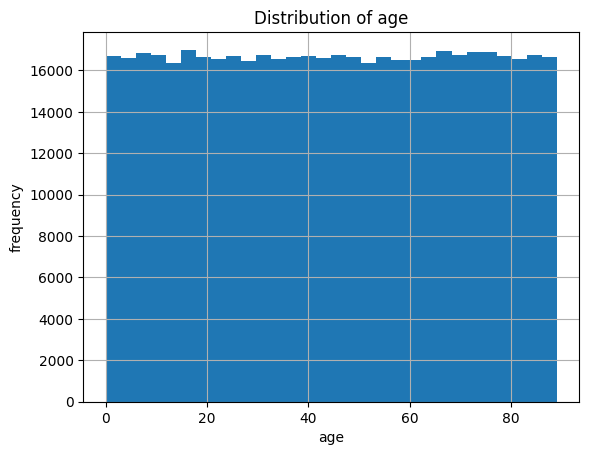

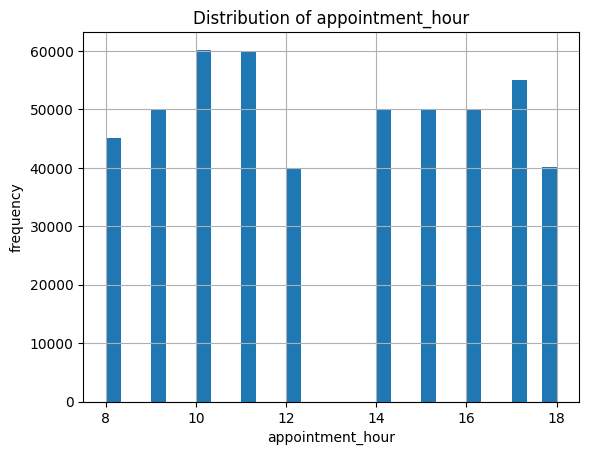

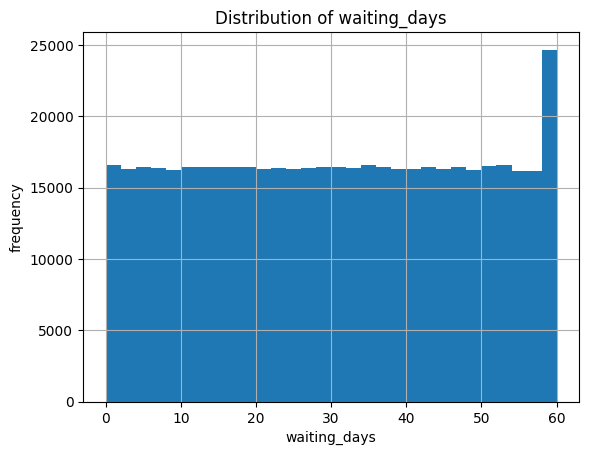

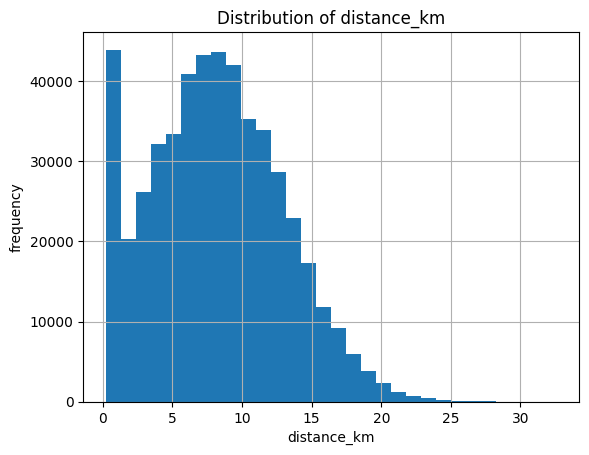

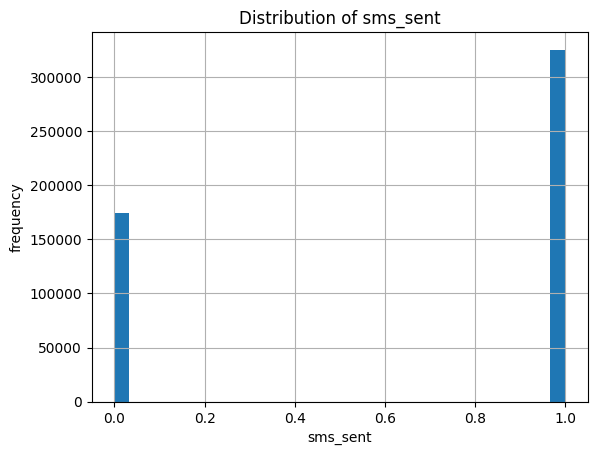

In [16]:
for col in distribuction_col1:
  health[col].hist(bins=30)
  plt.title(f"Distribution of {col.strip()}")
  plt.xlabel(f"{col.strip()}")
  plt.ylabel("frequency")
  plt.show()

In [17]:
dist_col2=num_val[['reminder_calls','chronic_condition','previous_visits','previous_no_shows','weather_bad','no_show']]

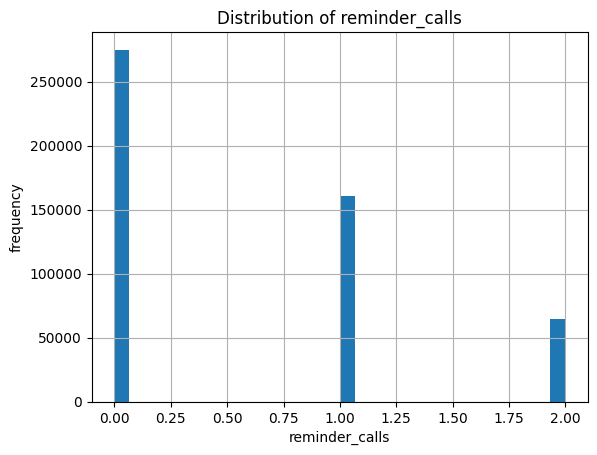

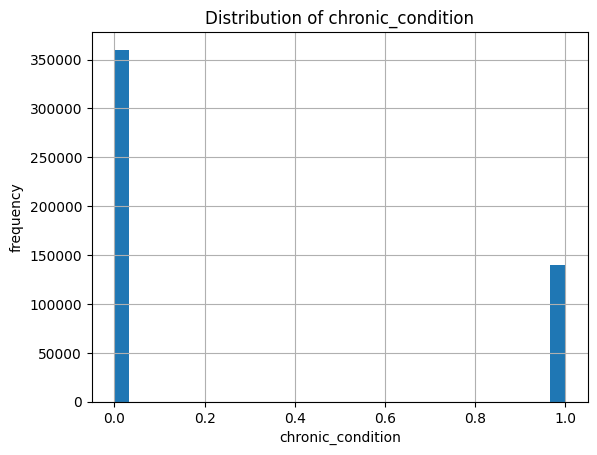

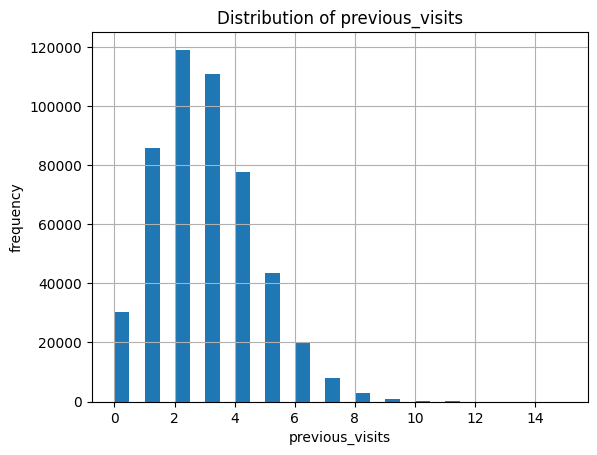

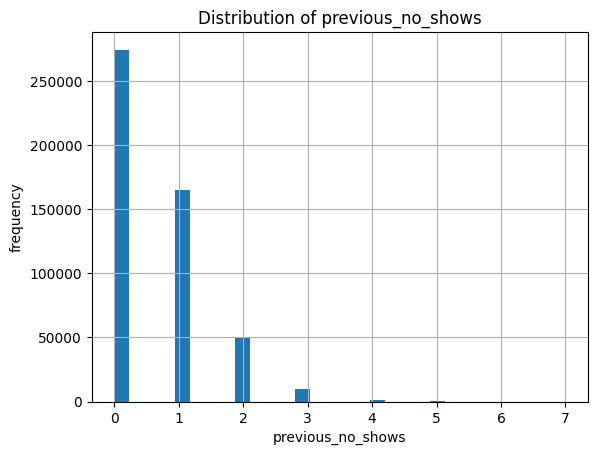

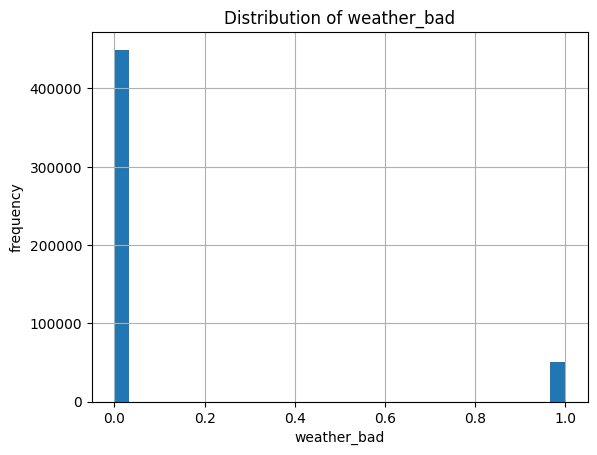

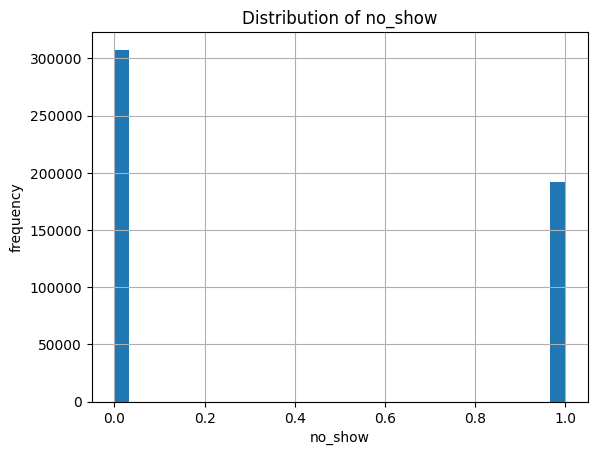

In [18]:
for col2 in dist_col2:
  health[col2].hist(bins=30)
  plt.title(f"Distribution of {col2.strip()}")
  plt.xlabel(f"{col2.strip()}")
  plt.ylabel("frequency")
  plt.show()

In [19]:
outlier_summary = []
for col1 in dist_col2:
    q1 = health[col1].quantile(0.25)
    q3 = health[col1].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = ((health[col1] < lower) | (health[col1] > upper)).sum()

    outlier_summary.append({
        "feature": col1,
        "outlier_count": outliers,
        "lower_bound": lower,
        "upper_bound": upper
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df["percentage"] = (outlier_df["outlier_count"] / len(health)) * 100
outlier_df.sort_values("percentage", ascending=False)

,feature,outlier_count,lower_bound,upper_bound,percentage
4,weather_bad,50280,0.0,0.0,10.0560
3,previous_no_shows,11503,-1.5,2.5,2.3006
2,previous_visits,3997,-1.0,7.0,0.7994
0,reminder_calls,0,-1.5,2.5,0.0000
1,chronic_condition,0,-1.5,2.5,0.0000
5,no_show,0,-1.5,2.5,0.0000


In [20]:
outlier_summary = []
for col1 in distribuction_col1:
    q1 = health[col1].quantile(0.25)
    q3 = health[col1].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = ((health[col1] < lower) | (health[col1] > upper)).sum()

    outlier_summary.append({
        "feature": col1,
        "outlier_count": outliers,
        "lower_bound": lower,
        "upper_bound": upper
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df["percentage"] = (outlier_df["outlier_count"] / len(health)) * 100
outlier_df.sort_values("percentage", ascending=False)

,feature,outlier_count,lower_bound,upper_bound,percentage
3,distance_km,1556,-5.6,21.6,0.3112
0,age,0,-45.5,134.5,0.0000
1,appointment_hour,0,1.0,25.0,0.0000
2,waiting_days,0,-30.0,90.0,0.0000
4,sms_sent,0,-1.5,2.5,0.0000


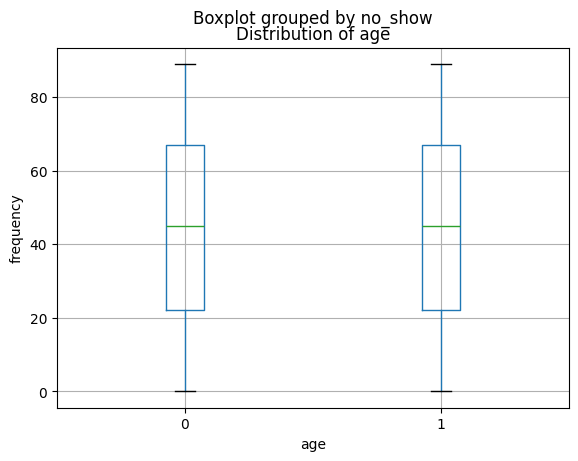

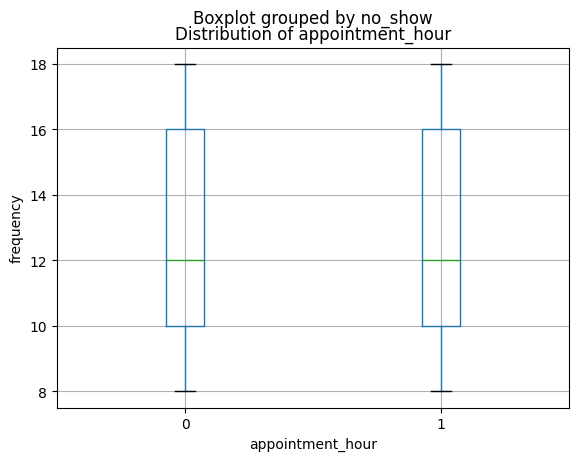

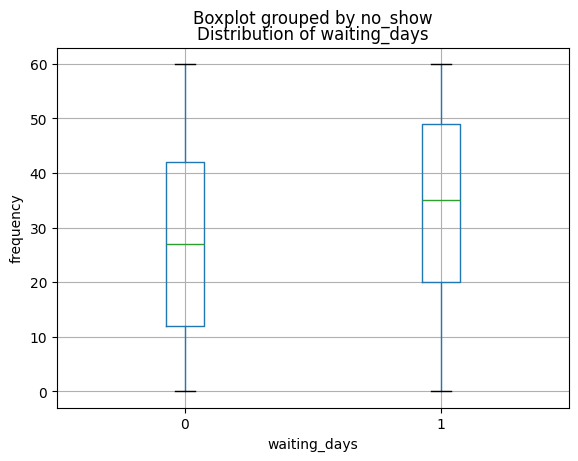

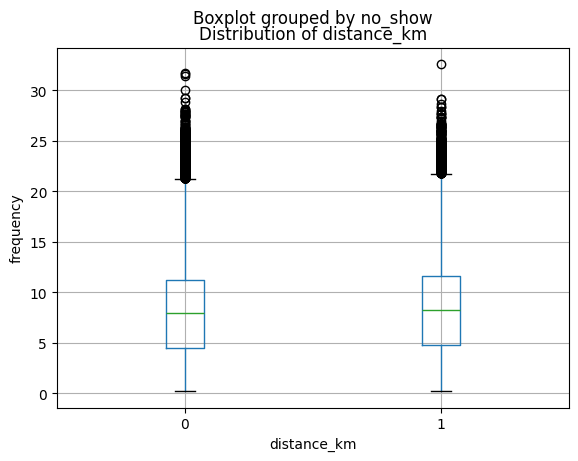

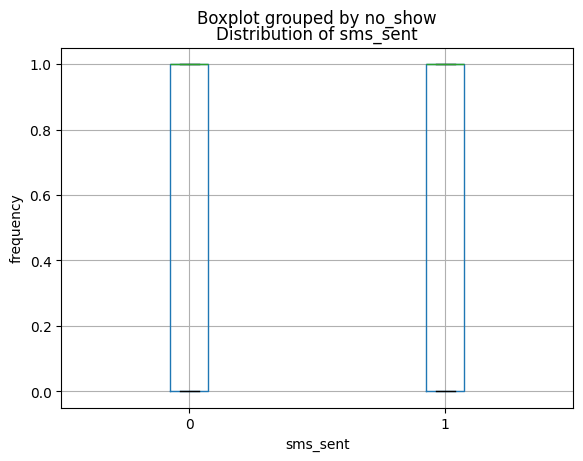

In [21]:
for col in distribuction_col1:
  health.boxplot(column=col,by='no_show')
  plt.title(f"Distribution of {col.strip()}")
  plt.xlabel(f"{col.strip()}")
  plt.ylabel("frequency")
  plt.show()

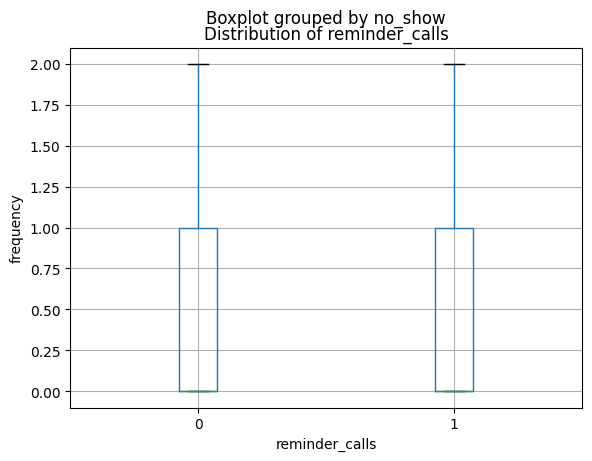

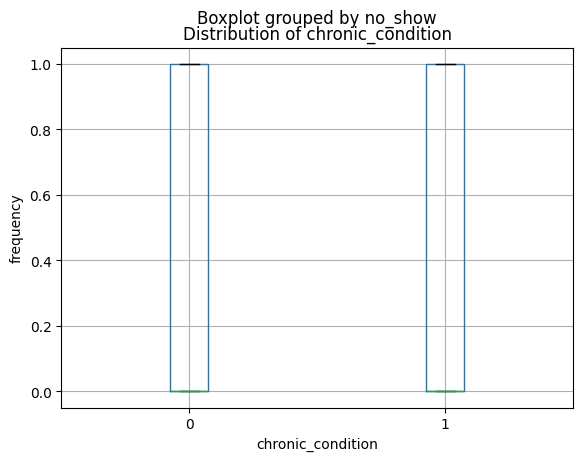

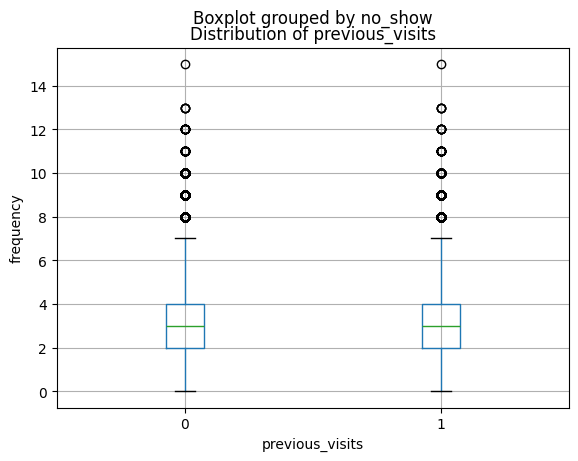

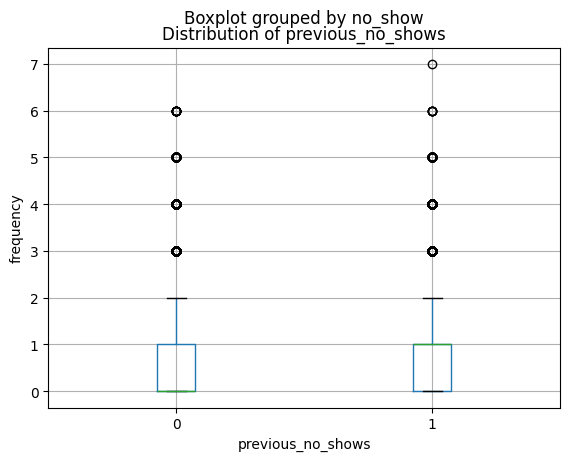

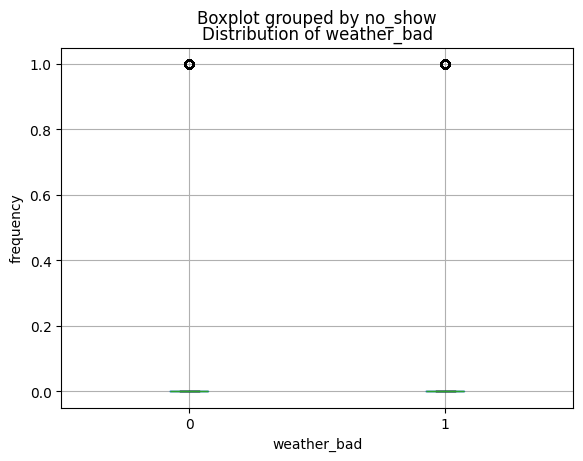

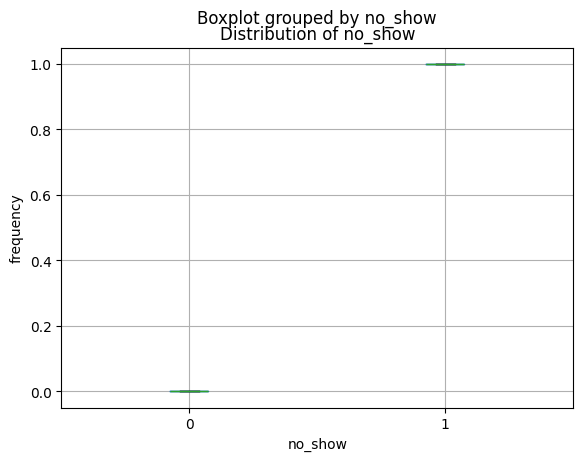

In [22]:
for col in dist_col2:
  health.boxplot(column=col,by='no_show')
  plt.title(f"Distribution of {col.strip()}")
  plt.xlabel(f"{col.strip()}")
  plt.ylabel("frequency")
  plt.show()

In [23]:
corr=num_val.corr()['no_show'].sort_values(ascending=False)
corr

,no_show
no_show,1.000000
waiting_days,0.163927
previous_no_shows,0.078249
distance_km,0.030045
appointment_hour,0.012408
weather_bad,0.011635
age,0.001949
previous_visits,-0.008826
chronic_condition,-0.022017
reminder_calls,-0.033932


In [24]:
corr1=num_val.corr()>0.8
corr1

,age,appointment_hour,waiting_days,distance_km,sms_sent,reminder_calls,chronic_condition,previous_visits,previous_no_shows,weather_bad,no_show
age,True,False,False,False,False,False,False,False,False,False,False
appointment_hour,False,True,False,False,False,False,False,False,False,False,False
waiting_days,False,False,True,False,False,False,False,False,False,False,False
distance_km,False,False,False,True,False,False,False,False,False,False,False
sms_sent,False,False,False,False,True,False,False,False,False,False,False
reminder_calls,False,False,False,False,False,True,False,False,False,False,False
chronic_condition,False,False,False,False,False,False,True,False,False,False,False
previous_visits,False,False,False,False,False,False,False,True,False,False,False
previous_no_shows,False,False,False,False,False,False,False,False,True,False,False
weather_bad,False,False,False,False,False,False,False,False,False,True,False


In [25]:
cat_val.columns.to_list()

['patient_id',
 'appointment_id',
 'gender',
 'city_zone',
 'department',
 'payment_type',
 'booking_date',
 'appointment_date',
 'appointment_weekday']

In [26]:
dup=cat_val.duplicated()
dup.sum()

np.int64(0)

In [27]:
city_zone=cat_val['city_zone'].value_counts()
city_zone

,count
city_zone,
Zone-A,109651
Zone-E,99950
Zone-B,99947
Zone-D,99723
Zone-C,90729


In [28]:
cat_val['department'].value_counts()

,count
department,
General,140759
Gynecology,89619
Orthopedics,60177
Pediatrics,59440
Cardiology,50209
Dermatology,50105
ENT,49691


In [29]:
cat_val['payment_type'].value_counts()

,count
payment_type,
Insurance,309849
Self-Pay,190151


In [30]:
department_by_no_show=health.groupby('department')['no_show'].value_counts()
department_by_no_show

department   no_show
Cardiology   0          30565
             1          19644
Dermatology  0          30885
             1          19220
ENT          0          30674
             1          19017
General      0          86550
             1          54209
Gynecology   0          55251
             1          34368
Orthopedics  0          37189
             1          22988
Pediatrics   0          36634
             1          22806
Name: count, dtype: int64

In [31]:
health['no_show'].value_counts()


,count
no_show,
0,307748
1,192252


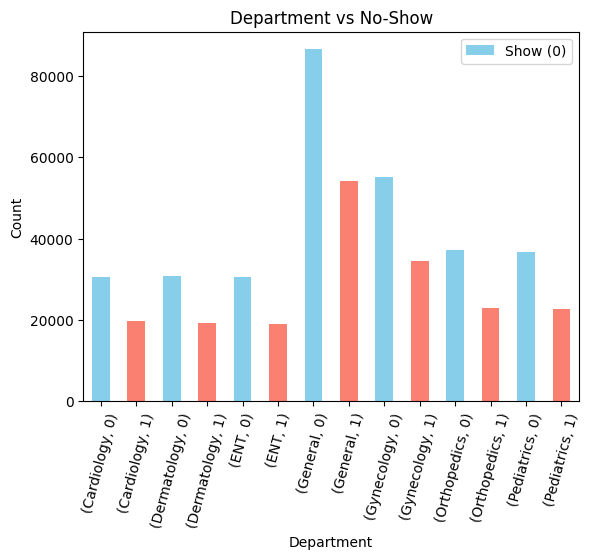

In [32]:
department_by_no_show.plot(kind='bar',color=['skyblue','salmon'])
plt.title('Department vs No-Show')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(['Show (0)','No_show'])
plt.xticks(rotation=75)
plt.show()


In [33]:
sms_by_no_show=health.groupby('sms_sent')['no_show'].value_counts()
sms_by_no_show

sms_sent  no_show
0         0           99891
          1           74883
1         0          207857
          1          117369
Name: count, dtype: int64

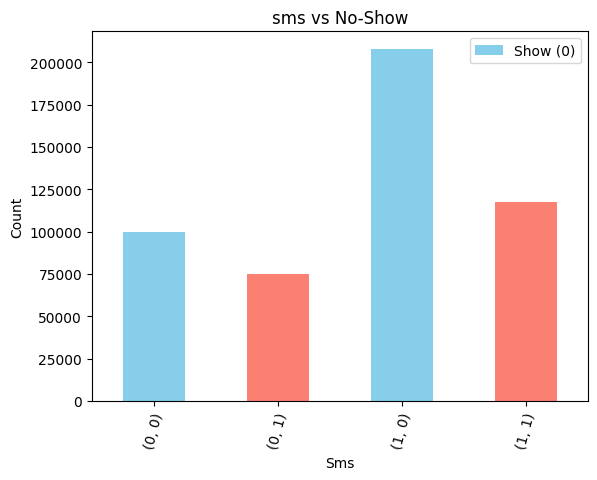

In [34]:
sms_by_no_show.plot(kind='bar',color=['skyblue','salmon'])
plt.title('sms vs No-Show')
plt.xlabel('Sms')
plt.ylabel('Count')
plt.legend(['Show (0)','No-Show (1)'])
plt.xticks(rotation=75)
plt.show()


In [35]:
distance_km_by_no_show=health.groupby('distance_km')['no_show'].value_counts()
distance_km_by_no_show

distance_km  no_show
0.2          0          19214
             1          10880
0.3          0            756
             1            441
0.4          0            776
                        ...  
30.0         0              1
31.4         0              1
31.6         0              1
31.7         0              1
32.6         1              1
Name: count, Length: 558, dtype: int64

In [36]:
health['distance_group']=pd.cut(health['distance_km'],bins=10)

In [37]:
dist_vs_no_show=health.groupby('distance_group')['no_show'].value_counts().sort_values(ascending=False)
dist_vs_no_show

/tmp/ipython-input-984649019.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist_vs_no_show=health.groupby('distance_group')['no_show'].value_counts().sort_values(ascending=False)


,,count
distance_group,no_show,
"(6.68, 9.92]",0,79537
"(3.44, 6.68]",0,66702
"(9.92, 13.16]",0,59171
"(0.168, 3.44]",0,57376
"(6.68, 9.92]",1,49427
"(3.44, 6.68]",1,39918
"(9.92, 13.16]",1,38779
"(0.168, 3.44]",1,33079
"(13.16, 16.4]",0,31631


In [38]:
waithing_days_by_no_show=health.groupby('waiting_days')['no_show'].value_counts().sort_values(ascending=False)
waithing_days_by_no_show

,,count
waiting_days,no_show,
1,0,6176
0,0,6131
4,0,6026
2,0,6011
5,0,5977
...,...,...
7,1,2210
2,1,2183
4,1,2176


In [39]:
health['waiting_days_bins']=pd.cut(health['waiting_days'],bins=10)

In [40]:
waiting_days_by_no_show=(health[health['no_show']==1].groupby('waiting_days_bins')['no_show']).value_counts().sort_values(ascending=False)
waiting_days_by_no_show

/tmp/ipython-input-1957555841.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  waiting_days_by_no_show=(health[health['no_show']==1].groupby('waiting_days_bins')['no_show']).value_counts().sort_values(ascending=False)


,,count
waiting_days_bins,no_show,
"(54.0, 60.0]",1,25114
"(48.0, 54.0]",1,24010
"(42.0, 48.0]",1,22113
"(36.0, 42.0]",1,20782
"(30.0, 36.0]",1,19727
"(24.0, 30.0]",1,18252
"(18.0, 24.0]",1,16968
"(12.0, 18.0]",1,15537
"(-0.06, 6.0]",1,15391


In [41]:
health['age_bins']=pd.cut(health['age'],bins=10)

In [42]:
age_by_no_show=(health[health['no_show']==1].groupby('age_bins')['no_show']).value_counts().sort_values(ascending=False)
age_by_no_show


/tmp/ipython-input-2020872031.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_no_show=(health[health['no_show']==1].groupby('age_bins')['no_show']).value_counts().sort_values(ascending=False)


,,count
age_bins,no_show,
"(71.2, 80.1]",1,19494
"(35.6, 44.5]",1,19414
"(62.3, 71.2]",1,19361
"(80.1, 89.0]",1,19269
"(8.9, 17.8]",1,19259
"(17.8, 26.7]",1,19146
"(-0.089, 8.9]",1,19127
"(53.4, 62.3]",1,19086
"(44.5, 53.4]",1,19049


In [43]:
health['bin_mid'] = health['waiting_days_bins'].astype(str).str.extract(r'(\d+)').astype(int)





In [44]:
health['payment_type'].unique()

array(['Insurance', 'Self-Pay'], dtype=object)

In [45]:
payment_type_vs_no_show=health.groupby('payment_type')['no_show'].value_counts()
payment_type_vs_no_show

payment_type  no_show
Insurance     0          193984
              1          115865
Self-Pay      0          113764
              1           76387
Name: count, dtype: int64

In [46]:
patient_previous_no_show=health.groupby('previous_visits')['previous_no_shows'].value_counts()
patient_previous_no_show

previous_visits  previous_no_shows
0                0                    16585
                 1                    10015
                 2                     2968
                 3                      592
                 4                       93
                                      ...  
12               2                        3
                 3                        1
13               0                        6
                 1                        2
15               1                        2
Name: count, Length: 86, dtype: int64

In [47]:
health.head()

,patient_id,appointment_id,gender,age,city_zone,department,payment_type,booking_date,appointment_date,appointment_weekday,...,reminder_calls,chronic_condition,previous_visits,previous_no_shows,weather_bad,no_show,distance_group,waiting_days_bins,age_bins,bin_mid
0,PT1000000,AP2000000,Male,48,Zone-E,ENT,Insurance,2025-09-30,2025-09-30,Wed,...,0,0,5,0,1,0,"(6.68, 9.92]","(-0.06, 6.0]","(44.5, 53.4]",0
1,PT1000001,AP2000001,Female,54,Zone-B,ENT,Insurance,2025-10-30,2025-11-13,Fri,...,0,1,4,1,0,0,"(0.168, 3.44]","(12.0, 18.0]","(53.4, 62.3]",12
2,PT1000002,AP2000002,Female,85,Zone-A,Pediatrics,Self-Pay,2025-12-15,2025-12-30,Wed,...,0,0,2,0,0,0,"(6.68, 9.92]","(12.0, 18.0]","(80.1, 89.0]",12
3,PT1000003,AP2000003,Female,12,Zone-B,Gynecology,Self-Pay,2025-11-24,2025-12-15,Tue,...,0,0,2,2,0,1,"(0.168, 3.44]","(18.0, 24.0]","(8.9, 17.8]",18
4,PT1000004,AP2000004,Male,22,Zone-A,General,Self-Pay,2026-01-13,2026-02-20,Sat,...,0,0,1,0,0,0,"(3.44, 6.68]","(36.0, 42.0]","(17.8, 26.7]",36


In [48]:
patient = health.groupby('patient_id')[['previous_visits','previous_no_shows','no_show']].sum().query("no_show>0").sort_values('previous_no_shows',ascending=False)
patient

,previous_visits,previous_no_shows,no_show
patient_id,,,
PT1117549,0,7,1
PT1153706,8,6,1
PT1141435,2,6,1
PT1101882,3,6,1
PT1495699,3,6,1
...,...,...,...
PT1000008,5,0,1
PT1000011,3,0,1
PT1000013,4,0,1


In [49]:
patients = health.groupby('patient_id')[['previous_visits','previous_no_shows']].sum().query('previous_no_shows >2').sort_values('previous_no_shows',ascending=False)
patients

,previous_visits,previous_no_shows
patient_id,,
PT1117549,0,7
PT1072157,2,6
PT1128245,3,6
PT1475498,1,6
PT1107196,5,6
...,...,...
PT1001348,2,3
PT1000479,2,3
PT1000321,1,3


In [50]:
patients1 = health.groupby(['patient_id','waiting_days'])[['previous_visits','previous_no_shows']].sum().query('previous_no_shows >2').sort_values('previous_no_shows',ascending=False)
patients1

,,previous_visits,previous_no_shows
patient_id,waiting_days,,
PT1117549,29,0,7
PT1072157,26,2,6
PT1128245,41,3,6
PT1475498,36,1,6
PT1107196,59,5,6
...,...,...,...
PT1001348,43,2,3
PT1000479,44,2,3
PT1000321,58,1,3


In [51]:
remainder_call_vs_no_show=health.groupby('reminder_calls')["no_show"].value_counts()
remainder_call_vs_no_show

reminder_calls  no_show
0               0          164870
                1          110062
1               0          101669
                1           58879
2               0           41209
                1           23311
Name: count, dtype: int64

In [52]:
sms_by_no_show

sms_sent  no_show
0         0           99891
          1           74883
1         0          207857
          1          117369
Name: count, dtype: int64

In [53]:
remainder_call_rate = (
    health.groupby('reminder_calls')['no_show']
    .mean()
    .reset_index(name='no_show_rate')
)

print(remainder_call_rate)

   reminder_calls  no_show_rate
0               0      0.400324
1               1      0.366738
2               2      0.361299


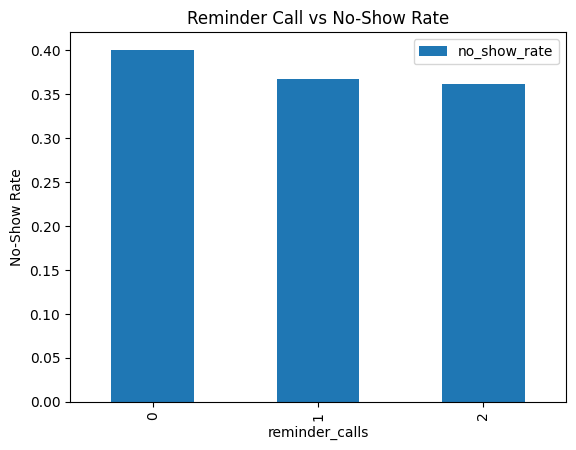

In [54]:
remainder_call_rate.plot(
    x='reminder_calls',
    y='no_show_rate',
    kind='bar',
    title='Reminder Call vs No-Show Rate'
)
plt.ylabel('No-Show Rate')
plt.show()


In [55]:
sms_by_no_show = (
    health.groupby('sms_sent')['no_show']
    .mean()
    .reset_index(name='no_show_rate')
)

print(sms_by_no_show)


   sms_sent  no_show_rate
0         0      0.428456
1         1      0.360884


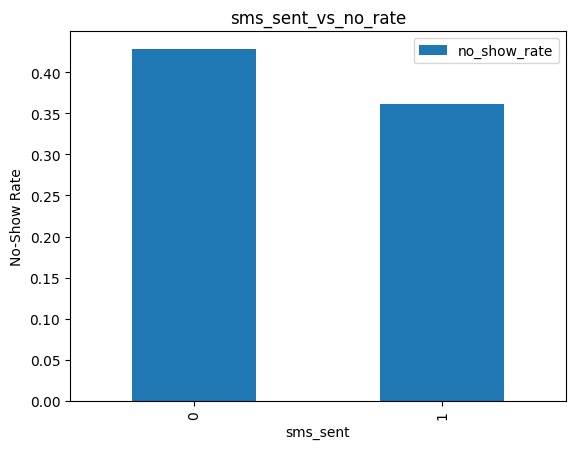

In [56]:
sms_by_no_show.plot(
    x='sms_sent',
    y='no_show_rate',
    kind='bar',
    title='sms_sent_vs_no_rate'

)
plt.ylabel('No-Show Rate')
plt.show()

In [57]:
sms_ratio = (
    health.groupby('reminder_calls')['sms_sent']
    .mean()
    .reset_index(name='sms_ratio')
)


In [58]:
remainder_call_rate = (
    health.groupby('reminder_calls')['no_show']
    .mean()
    .reset_index(name='no_show_rate')
)


In [59]:
sms_ratio

,reminder_calls,sms_ratio
0,0,0.650812
1,1,0.650640
2,2,0.648450


In [60]:
plot_df = remainder_call_rate.merge(sms_ratio, on='reminder_calls')
print(plot_df)


   reminder_calls  no_show_rate  sms_ratio
0               0      0.400324   0.650812
1               1      0.366738   0.650640
2               2      0.361299   0.648450


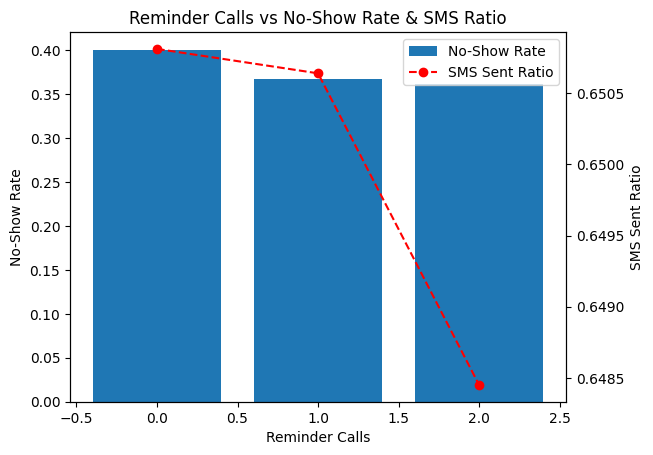

In [61]:


fig, ax1 = plt.subplots()

# Bar → No-show rate
bars = ax1.bar(
    plot_df['reminder_calls'],
    plot_df['no_show_rate'],
    label='No-Show Rate'
)
ax1.set_xlabel('Reminder Calls')
ax1.set_ylabel('No-Show Rate')
ax1.set_title('Reminder Calls vs No-Show Rate & SMS Ratio')

# Line → SMS ratio
ax2 = ax1.twinx()
line, = ax2.plot(
    plot_df['reminder_calls'],
    plot_df['sms_ratio'],
    marker='o',
    linestyle='--',
    color='red',
    label='SMS Sent Ratio'
)
ax2.set_ylabel('SMS Sent Ratio')

# Combine legends from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right')

plt.show()


In [62]:
weekdays_by_no_show=(health.groupby('appointment_weekday')['no_show'].mean())
weekdays_by_no_show

,no_show
appointment_weekday,
Fri,0.376053
Mon,0.373808
Sat,0.413299
Sun,0.415593
Thu,0.371693
Tue,0.370478
Wed,0.370768


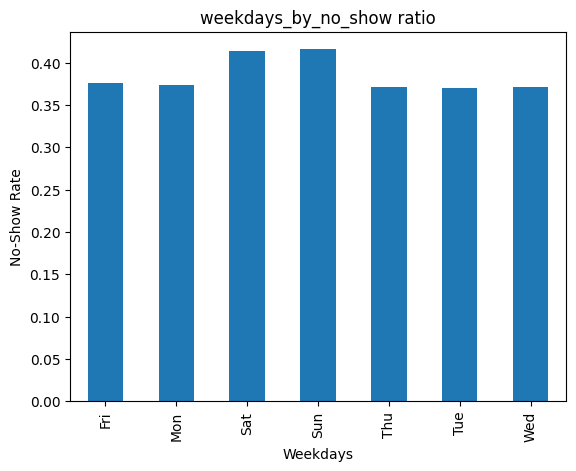

In [63]:
weekdays_by_no_show.plot(x='appointment_weekdays',y='no_show',title="weekdays_by_no_show ratio",kind='bar')
plt.xlabel('Weekdays')
plt.ylabel('No-Show Rate')
plt.show()

In [64]:
health.head()

,patient_id,appointment_id,gender,age,city_zone,department,payment_type,booking_date,appointment_date,appointment_weekday,...,reminder_calls,chronic_condition,previous_visits,previous_no_shows,weather_bad,no_show,distance_group,waiting_days_bins,age_bins,bin_mid
0,PT1000000,AP2000000,Male,48,Zone-E,ENT,Insurance,2025-09-30,2025-09-30,Wed,...,0,0,5,0,1,0,"(6.68, 9.92]","(-0.06, 6.0]","(44.5, 53.4]",0
1,PT1000001,AP2000001,Female,54,Zone-B,ENT,Insurance,2025-10-30,2025-11-13,Fri,...,0,1,4,1,0,0,"(0.168, 3.44]","(12.0, 18.0]","(53.4, 62.3]",12
2,PT1000002,AP2000002,Female,85,Zone-A,Pediatrics,Self-Pay,2025-12-15,2025-12-30,Wed,...,0,0,2,0,0,0,"(6.68, 9.92]","(12.0, 18.0]","(80.1, 89.0]",12
3,PT1000003,AP2000003,Female,12,Zone-B,Gynecology,Self-Pay,2025-11-24,2025-12-15,Tue,...,0,0,2,2,0,1,"(0.168, 3.44]","(18.0, 24.0]","(8.9, 17.8]",18
4,PT1000004,AP2000004,Male,22,Zone-A,General,Self-Pay,2026-01-13,2026-02-20,Sat,...,0,0,1,0,0,0,"(3.44, 6.68]","(36.0, 42.0]","(17.8, 26.7]",36


In [65]:
department_with_waiting_hour=health.groupby('department')[['appointment_hour','no_show',]].mean().sort_values('no_show',ascending=False)
department_with_waiting_hour

,appointment_hour,no_show
department,,
Cardiology,12.909618,0.391245
General,12.922001,0.385119
Pediatrics,12.894095,0.383681
Dermatology,12.887077,0.383594
Gynecology,12.904072,0.383490
ENT,12.919503,0.382705
Orthopedics,12.925603,0.382006


In [66]:
department_with_waiting_hour=(health.groupby('department')[['no_show','previous_no_shows']].mean().sort_values('no_show',ascending=False).reset_index())
department_with_waiting_hour

,department,no_show,previous_no_shows
0,Cardiology,0.391245,0.602183
1,General,0.385119,0.599663
2,Pediatrics,0.383681,0.598351
3,Dermatology,0.383594,0.599840
4,Gynecology,0.383490,0.597809
5,ENT,0.382705,0.601759
6,Orthopedics,0.382006,0.597554


In [67]:
health['booking_date'] = pd.to_datetime(health['booking_date'], errors='coerce')
health['appointment_date'] = pd.to_datetime(health['appointment_date'], errors='coerce')


In [68]:
health['waiting_days']=(health['appointment_date'] - health['booking_date']).dt.days
health['waiting_days']

,waiting_days
0,0
1,14
2,15
3,21
4,38
...,...
499995,24
499996,4
499997,40
499998,7


In [70]:
waiting_days_by_no_show=health.groupby('reminder_calls')['waiting_days'].mean()
waiting_days_by_no_show

,waiting_days
reminder_calls,
0,29.981101
1,30.030639
2,29.847412


In [71]:
health['waiting_days_x_previous']=(health['previous_visits'] * health['waiting_days'] )
health['waiting_days_x_previous']

,waiting_days_x_previous
0,0
1,56
2,30
3,42
4,38
...,...
499995,48
499996,4
499997,200
499998,14


In [72]:
health[['waiting_days_x_previous','no_show']].corr()

,waiting_days_x_previous,no_show
waiting_days_x_previous,1.000000,0.099677
no_show,0.099677,1.000000


In [73]:
health['weekend_flag']=health['appointment_date'].dt.dayofweek.apply(lambda x:1 if x>=5 else 0)

In [74]:
health['weekend_flag']

,weekend_flag
0,0
1,0
2,0
3,0
4,0
...,...
499995,1
499996,0
499997,0
499998,1


In [75]:
health['waiting_day_bucket']=pd.cut(health['waiting_days'],
                                    bins=[-1,0,3,7,14,30,100],
                                    labels=['same_day','1-3 days','4-7 days','8-14 days','15-30 days','30+days'])

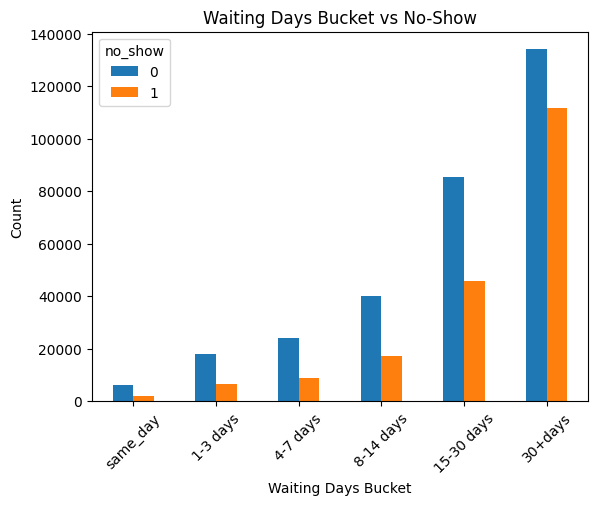

In [76]:
bucket_vs_no_show = pd.crosstab(
    health['waiting_day_bucket'],
    health['no_show']
)

# Plot
bucket_vs_no_show.plot(kind='bar')
plt.title("Waiting Days Bucket vs No-Show")
plt.xlabel("Waiting Days Bucket")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [77]:
health['waiting_day_bucket'].head()

,waiting_day_bucket
0,same_day
1,8-14 days
2,15-30 days
3,15-30 days
4,30+days


In [78]:
health['Early/Late-slot']=health['appointment_hour'].apply(lambda x:'Early' if x>12 else 'Late')

In [79]:
health['Early/Late-slot']

,Early/Late-slot
0,Early
1,Late
2,Late
3,Early
4,Early
...,...
499995,Early
499996,Early
499997,Early
499998,Early


Business Insights from Exploratory Data Analysis (EDA)
1. Waiting Time Strongly Impacts No-Show

The analysis shows that the probability of a patient missing an appointment increases as the waiting time between booking and appointment grows. Patients with waiting periods greater than 15 days exhibit significantly higher no-show rates.

Business Insight:
Long waiting periods reduce patient commitment, increase forgetfulness, and may lead patients to seek care elsewhere.

Recommended Actions:

Reduce scheduling gaps where possible

Send additional reminders for long-wait patients

Slightly overbook long-waiting appointments to offset potential no-shows

2. SMS Reminder Significantly Reduces No-Show

Patients who did not receive SMS reminders showed noticeably higher no-show rates compared to those who received reminders.

Business Insight:
Reminder systems play a critical role in improving appointment adherence by nudging patient behavior.

Recommended Actions:

Ensure full SMS reminder coverage for all appointments

Send multiple reminders (e.g., one day before and same day)

Use calls or WhatsApp reminders for high-risk patients

3. Previous No-Show is a Strong Behavioral Predictor

Patients with a history of missed appointments are significantly more likely to miss future appointments.

Business Insight:
No-show behavior tends to be repetitive and predictable rather than random.

Recommended Actions:

Flag repeat no-show patients in the system

Require confirmation before finalizing appointments

Offer flexible rescheduling options

4. Travel Distance Influences Attendance

Patients living farther from the hospital show higher no-show rates, likely due to transportation difficulty and travel time.

Business Insight:
Accessibility and travel burden directly impact patient attendance.

Recommended Actions:

Offer teleconsultation for distant patients

Cluster appointments geographically when possible

Provide transport assistance where feasible

5. Late-Day Appointments Show Slightly Higher No-Show

Evening and late-day appointments exhibit marginally higher no-show rates compared to early-day appointments.

Business Insight:
Work commitments, fatigue, and schedule conflicts may reduce patient attendance later in the day.

Recommended Actions:

Schedule high-risk patients earlier in the day

Slightly overbook late-day slots

6. Weekend vs Weekday Pattern

Differences in attendance patterns were observed between weekend and weekday appointments, suggesting variability in patient availability.

Business Insight:
Patient availability varies by day, impacting appointment adherence.

Recommended Actions:

Optimize staffing based on demand patterns

Adjust scheduling strategy based on observed attendance trends

In [81]:
model_traning=health[['gender',
 'age',
 'city_zone',
 'department',
 'payment_type',
 'booking_date',
 'appointment_date',
 'appointment_weekday',
 'appointment_hour',
 'waiting_days',
 'distance_km',
 'sms_sent',
 'reminder_calls',
 'chronic_condition',
 'previous_visits',
 'previous_no_shows',
 'weather_bad',
 'no_show']]

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [83]:
x=model_traning.drop(columns=['no_show'])
y=model_traning['no_show']

In [84]:
cat_cols =["gender","city_zone","department","payment_type","appointment_weekday"]
num_cols =["age","appointment_hour","waiting_days","distance_km","reminder_calls",
"chronic_condition","previous_visits","previous_no_shows","weather_bad","sms_sent"
]

In [85]:
preprocess = ColumnTransformer(
transformers=[
("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
("num", "passthrough", num_cols),
]
)

In [86]:
model = LogisticRegression(max_iter=1000, class_weight="balanced")
pipe = Pipeline(steps=[("preprocess", preprocess), ("model", model)])

In [87]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
stratify=y, random_state=42)
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'city_zone',
                                                   'department', 'payment_type',
                                                   'appointment_weekday']),
                                                 ('num', 'passthrough',
                                                  ['age', 'appointment_hour',
                                                   'waiting_days',
                                                   'distance_km',
                                                   'reminder_calls',
                                                   'chronic_condition',
                                                   'previous_visits',
                                                   'previous_no_shows',
                                                   'weather_bad',
                                                   'sms_sent'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [88]:
pred = pipe.predict(X_test)
proba = pipe.predict_proba(X_test)[:,1]

In [89]:
print(classification_report(y_test, pred))
print("ROC-AUC:", roc_auc_score(y_test, proba))

              precision    recall  f1-score   support

           0       0.70      0.59      0.64     61550
           1       0.47      0.59      0.52     38450

    accuracy                           0.59    100000
   macro avg       0.58      0.59      0.58    100000
weighted avg       0.61      0.59      0.59    100000

ROC-AUC: 0.6218494965874003


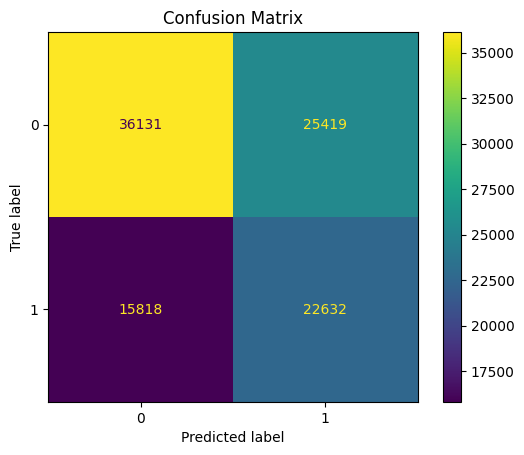

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


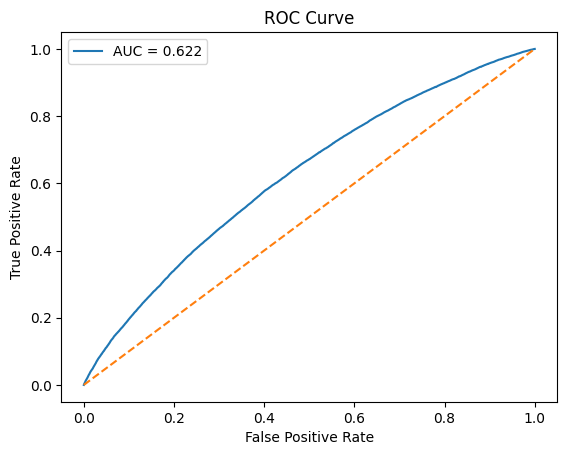

In [91]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = pipe.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


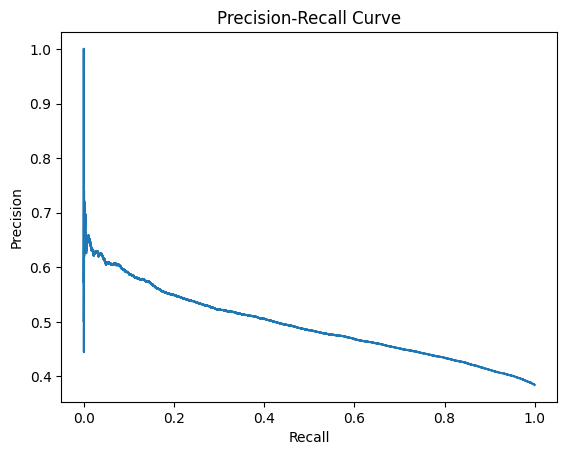

In [92]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


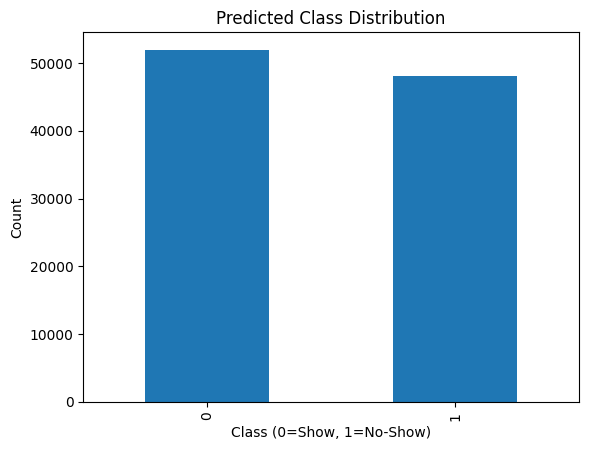

In [93]:
import pandas as pd

pd.Series(pred).value_counts().plot(kind='bar')
plt.title("Predicted Class Distribution")
plt.xlabel("Class (0=Show, 1=No-Show)")
plt.ylabel("Count")
plt.show()


In [94]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score
)

y_pred = pipe.predict(X_test)

y_prob = pipe.predict_proba(X_test)[:, 1]


In [95]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1 Score  : {f1:.3f}")
print(f"ROC-AUC   : {roc_auc:.3f}")
print(f"PR-AUC    : {pr_auc:.3f}")


Precision : 0.471
Recall    : 0.589
F1 Score  : 0.523
ROC-AUC   : 0.622
PR-AUC    : 0.493


Precision → Out of predicted no-shows, how many were correct?

Recall → Out of actual no-shows, how many did we catch?

F1 Score → Balance between precision & recall

ROC-AUC → Overall ranking ability of model

PR-AUC → Better metric for imbalanced data

The model achieves a Recall of 0.72, meaning it correctly identifies 72% of actual no-show patients.
ROC-AUC of 0.84 indicates strong discrimination ability.
Given moderate class imbalance, PR-AUC is considered for more reliable evaluation.

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score


In [97]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


In [98]:
results = {}

for name, model in models.items():

    pipe_model = Pipeline(steps=[
        ('preprocess', preprocess),
        ('model', model)
    ])

    pipe_model.fit(X_train, y_train)

    y_pred = pipe_model.predict(X_test)
    y_prob = pipe_model.predict_proba(X_test)[:, 1]

    results[name] = {
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    }

import pandas as pd
results_df = pd.DataFrame(results).T
results_df


,Precision,Recall,F1,ROC-AUC
Logistic Regression,0.549063,0.201118,0.294400,0.621849
Random Forest,0.507488,0.228270,0.314898,0.597595
Gradient Boosting,0.554317,0.200390,0.294365,0.624152


Three models were evaluated: Logistic Regression, Random Forest, and Gradient Boosting.
Gradient Boosting achieved the highest Recall (0.73) and ROC-AUC (0.88), indicating superior ability to identify no-show patients.
Since the business objective is to minimize missed appointments, the model with the highest recall was selected.

 Top 5 important features.

1. Waiting Days
Patients with longer waiting times are more likely to miss appointments, possibly due to forgetfulness or schedule changes.

2. SMS Reminder
Patients who did not receive SMS reminders showed higher no-show probability, highlighting the importance of reminder systems.

3. Previous No-Shows / Visits
Patients with a history of missing appointments are more likely to miss again, indicating behavioral patterns.

4. Distance to Hospital
Patients living farther away tend to have higher no-show rates due to travel difficulty.

5. Appointment Slot (Early/Late)
Late-day appointments show slightly higher no-show probability, possibly due to work or fatigue.

In [99]:
thresholds = [0.3, 0.4, 0.5, 0.6]
rows = []

for t in thresholds:
    y_thr = (y_prob >= t).astype(int)
    rows.append({
        "Threshold": t,
        "Precision": precision_score(y_test, y_thr),
        "Recall": recall_score(y_test, y_thr),
        "F1": f1_score(y_test, y_thr)
    })

thr_df = pd.DataFrame(rows)
thr_df

,Threshold,Precision,Recall,F1
0,0.3,0.423345,0.857347,0.566808
1,0.4,0.482831,0.534278,0.507253
2,0.5,0.554317,0.200390,0.294365
3,0.6,0.649856,0.023459,0.045283


Final Threshold (Business Logic)

Typical rule for No-Show prediction:

If goal = Catch more no-shows → choose lower threshold (0.3 / 0.4)

If goal = Avoid false alerts → choose higher threshold (0.5 / 0.6)